In [1]:
from datasets import load_dataset
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tokenizers import Tokenizer

In [2]:
ds = load_dataset("liuhaotian/LLaVA-Instruct-150K",streaming=True)

In [3]:
ds

IterableDatasetDict({
    train: IterableDataset({
        features: Unknown,
        num_shards: 6
    })
})

In [4]:
print(ds['train'][0])

In [5]:
def get_tokenizer(tokenizer_path=None):
    """
    Load custom BPE tokenizer.

    Args:
        tokenizer_path: Path to tokenizer.json file.
                       Defaults to bpe_tokenizer_with_image_tagpe_tokenizer.json
    """
    if tokenizer_path is None:
        # Default path relative to project root
        tokenizer_path = Path.cwd().parent / "bpe_tokenizer_with_image_tag.json"

    tokenizer_path = Path(tokenizer_path)

    if not tokenizer_path.exists():
        raise FileNotFoundError(
            f"Tokenizer not found at {tokenizer_path}. "
            "Run notebooks/build_tokenizer.ipynb first."
        )

    tokenizer = Tokenizer.from_file(str(tokenizer_path))
    print(f"Loaded tokenizer from {tokenizer_path}")
    print(f"Vocab size: {tokenizer.get_vocab_size()}")

    return tokenizer

tokenizer = get_tokenizer()

Loaded tokenizer from /home/smedar/code_files/llama4-from-scratch/visual_instruction_tuning/bpe_tokenizer_with_image_tag.json
Vocab size: 32001


{'conversations': [{'from': 'human',
                    'value': '<image>\n'
                             'What skill set might someone need to perform '
                             'such a frisbee trick?'},
                   {'from': 'gpt',
                    'value': 'To perform the frisbee trick shown in the image, '
                             'where the man is passing a frisbee between or '
                             'underneath his legs, a person would need a '
                             'combination of skills. These skills include good '
                             'hand-eye coordination, agility, balance, '
                             'flexibility, and dexterity. Additionally, the '
                             'ability to throw and catch the frisbee '
                             'accurately while maintaining control of bodily '
                             'movements would also be essential. To perfect '
                             'the trick, practicing these ski

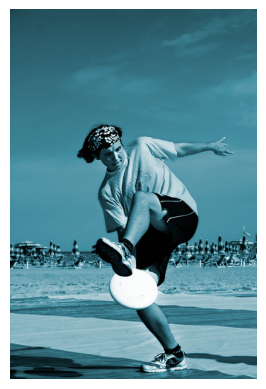

--------------------------------------------------


In [6]:
from PIL import Image
from pathlib import Path

# Path to your downloaded COCO images
COCO_IMAGES_PATH = Path("/home/smedar/fiftyone/coco-2017/train/data")

for sample in ds['train'].take(1):
    pprint(sample)
    
    # Load the actual image from COCO path
    image_path = COCO_IMAGES_PATH / sample['image']
    if image_path.exists():
        img = Image.open(image_path)
        print(f'Image Shape: {np.array(img).shape}')
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found: {image_path}")
    print("-" * 50)